In [1]:
import os
import sys
from pathlib import Path
#for hpc
#notebook_dir = Path(os.getcwd()) / "AntiBERTa"
#for local device:
notebook_dir = Path(os.getcwd())
os.chdir(notebook_dir)

if str(notebook_dir) not in sys.path:
    sys.path.insert(0, str(notebook_dir))

print("New CWD:", os.getcwd())
print("Files here:", os.listdir())
print("sys.path includes notebook dir:", notebook_dir in map(Path, sys.path))


tok_dir = Path(os.getcwd()) / "tokenizer"
print("Tokenizer folder exists:", tok_dir.exists())
print("Contents:", list(tok_dir.iterdir()) if tok_dir.exists() else "N/A")
#works on hpc
#print("Files in module folder:", os.listdir(notebook_dir))

'''
remember to change kernelspec in HPC file to:
"kernelspec": {
    "display_name": "pytorch_env",
    "language": "python",
    "name": "pytorch_env"
  },

where pytorch_env is the conda environment with the required kernel and modules
'''

New CWD: c:\Users\felip\Documents\Thesis Language Learning\LanguageLearningModelsForAntigenPresentationPrediction\AntiBERTa
Files here: ['antibertaTrainHLAA0201.py', 'createROCs.ipynb', 'data', 'generatedPeptides', 'generatePeptides.py', 'hyperparamData', 'hyperparametricAnalysis.ipynb', 'hyperparamSearch.py', 'levenshteinDist.ipynb', 'lossAnalysis.py', 'metrics.ipynb', 'models', 'models3', 'modelsPeptideOnly', 'motifs2.png', 'netmhcBenchmark', 'netmhcbenchmark.ipynb', 'quality.py', 'results', 'run5Fold.py', 'runSingleFold.py', 'test', 'tmp_output', 'tokenizer', 'TransmutModel', '__pycache__']
sys.path includes notebook dir: True
Tokenizer folder exists: True
Contents: [WindowsPath('c:/Users/felip/Documents/Thesis Language Learning/LanguageLearningModelsForAntigenPresentationPrediction/AntiBERTa/tokenizer/merges.txt'), WindowsPath('c:/Users/felip/Documents/Thesis Language Learning/LanguageLearningModelsForAntigenPresentationPrediction/AntiBERTa/tokenizer/vocab.json')]


'\nremember to change kernelspec in HPC file to:\n"kernelspec": {\n    "display_name": "pytorch_env",\n    "language": "python",\n    "name": "pytorch_env"\n  },\n\nwhere pytorch_env is the conda environment with the required kernel and modules\n'

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
# Settings for plots from Methods for Data Science module at Imperial College London
# we define a mix of fontsizes, for different parts of a plot
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

import seaborn as sns

# example of how you can use these fontsizes to set a global configuration for matplotlib;
# you should assign them based on the specific appearance of the figures you are producing
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#setting seeds
seed = 6
random.seed(seed )
torch.manual_seed(seed )
np.random.seed(seed ) 
colors = ['#9BC995', "#083D77", '#9A031E', '#C4B7CB', '#FC7753']

# Create a seaborn palette from these colors
custom_palette = sns.color_palette(colors)
palette = sns.color_palette(custom_palette, n_colors=15)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from quality import convert_number, calculate_error_3

# Load real peptides and filter for HLA-A*02:01
real_df = pd.read_csv("data/fullData/train_HLA_A0201.csv")
real_df = real_df[real_df["HLA"] == "HLA-A*02:01"]

# Load generated peptides
gen_df = pd.read_csv("generatedPeptides/HLAA0201/generated_peptides.csv")
gen_df = gen_df[gen_df["length"] == gen_df["peptide"].str.len()]

In [4]:
from tqdm import tqdm

lengths = sorted(set(real_df["Length"]).intersection(set(gen_df["length"])))
lengths = [length for length in lengths if length <= 14 and length >= 8]
errors_by_length = {
    "length": [],
    "1-site freq": [],
    "2-site freq": [],
    "3-site freq": [],
    "2-site cov": [],
    "3-site cov": [],
}

# Dictionaries to store the matrices for plotting
mudata_by_length = {}
mugen_by_length = {}
fdata_by_length = {}
fgen_by_length = {}
f3data_by_length = {}
f3gen_by_length = {}
cov_data_by_length = {}
cov_gen_by_length = {}
cov3_data_by_length = {}
cov3_gen_by_length = {}

for length in tqdm(lengths):
    real = np.array(real_df[real_df["Length"] == length]["peptide"].tolist())
    generated = np.array(gen_df[gen_df["length"] == length]["peptide"].tolist())

    (
        errmt, errmt2, errmt3, errct, errct2,
        mugen, mudata, fgen, fdata, f3gen, f3data,
        covgen, covdata, cov3gen, cov3data
    ) = calculate_error_3(real, generated, L=length, q=24, ifmat=True)


    errors_by_length["length"].append(length)
    errors_by_length["1-site freq"].append(errmt)
    errors_by_length["2-site freq"].append(errmt2)
    errors_by_length["3-site freq"].append(errmt3)
    errors_by_length["2-site cov"].append(errct)
    errors_by_length["3-site cov"].append(errct2)

    mudata_by_length[length] = mudata
    mugen_by_length[length] = mugen
    fdata_by_length[length] = fdata
    fgen_by_length[length] = fgen
    f3data_by_length[length] = f3data
    f3gen_by_length[length] = f3gen
    cov_data_by_length[length] = covdata
    cov_gen_by_length[length] = covgen
    cov3_data_by_length[length] = cov3data
    cov3_gen_by_length[length] = cov3gen



  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [08:37<00:00, 73.99s/it]


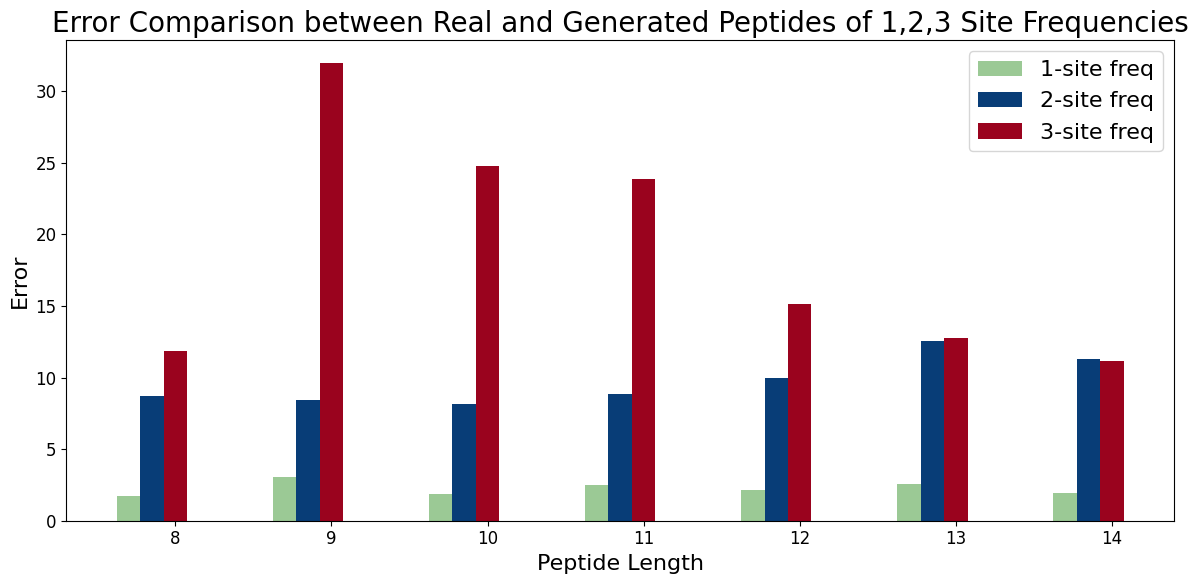

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert to DataFrame for plotting
err_df = pd.DataFrame(errors_by_length)

# Set up bar width and positions
bar_width = 0.15
x = np.arange(len(err_df["length"]))

# Plot grouped bar chart
plt.figure(figsize=(12, 6))

plt.bar(x - 2*bar_width, err_df["1-site freq"], width=bar_width, label="1-site freq", color = colors[0])
plt.bar(x - bar_width, err_df["2-site freq"], width=bar_width, label="2-site freq", color =colors[1])
plt.bar(x, err_df["3-site freq"], width=bar_width, label="3-site freq", color =colors[2])

# X-axis setup
plt.xlabel("Peptide Length")
plt.ylabel("Error")
plt.title("Error Comparison between Real and Generated Peptides of 1,2,3 Site Frequencies")
plt.xticks(x, err_df["length"])
plt.legend()
plt.tight_layout()
plt.show()


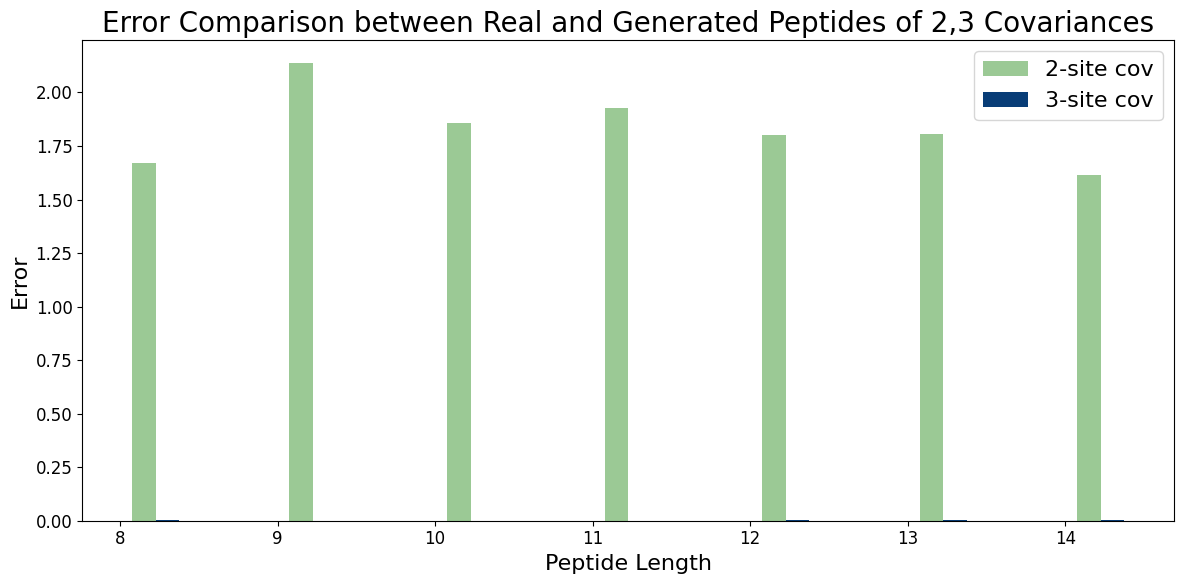

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert to DataFrame for plotting
err_df = pd.DataFrame(errors_by_length)

# Set up bar width and positions
bar_width = 0.15
x = np.arange(len(err_df["length"]))

# Plot grouped bar chart
plt.figure(figsize=(12, 6))

plt.bar(x + bar_width, err_df["2-site cov"], width=bar_width, label="2-site cov", color =colors[0])
plt.bar(x + 2*bar_width, err_df["3-site cov"], width=bar_width, label="3-site cov",color = colors[1])

# X-axis setup
plt.xlabel("Peptide Length")
plt.ylabel("Error")
plt.title("Error Comparison between Real and Generated Peptides of 2,3 Covariances")
plt.xticks(x, err_df["length"])
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_21524\1381935330.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


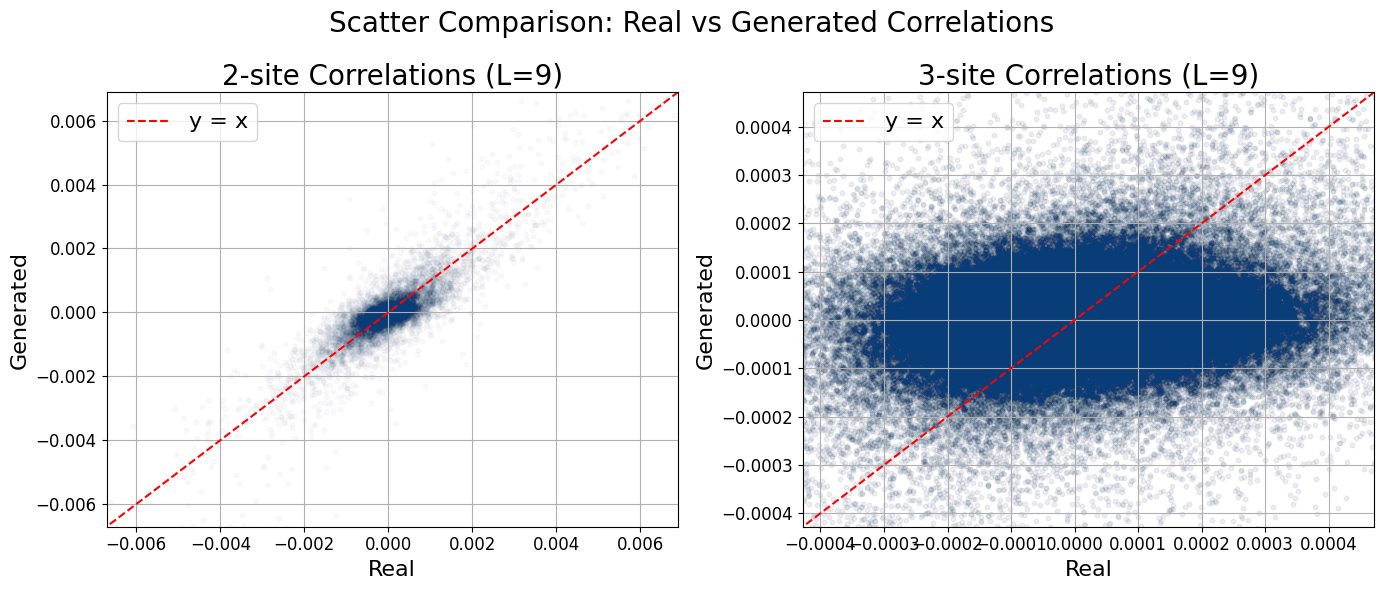

In [7]:
length = 9  

cov2_real = cov_data_by_length[length]
cov2_gen = cov_gen_by_length[length]
cov3_real = cov3_data_by_length[length]
cov3_gen = cov3_gen_by_length[length]

flat_cov2_real = cov2_real.flatten()
flat_cov2_gen = cov2_gen.flatten()
flat_cov3_real = cov3_real.flatten()
flat_cov3_gen = cov3_gen.flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Function to compute central zoom limits
def zoom_limits(real, gen, lower=0.1, upper=99.9): 
    combined = np.concatenate([real, gen])
    return np.percentile(combined, [lower, upper])

# 2-site cov scatter
axes[0].scatter(flat_cov2_real, flat_cov2_gen, alpha=0.01, s=10, color=colors[1])
axes[0].plot([flat_cov2_real.min(), flat_cov2_real.max()],
             [flat_cov2_real.min(), flat_cov2_real.max()],
             'r--', label='y = x')
axes[0].set_title(f"2-site Correlations (L={length})")
axes[0].set_xlabel("Real")
axes[0].set_ylabel("Generated")
axes[0].legend()
axes[0].grid(True)
axes[0].set_xlim(zoom_limits(flat_cov2_real, flat_cov2_gen))
axes[0].set_ylim(zoom_limits(flat_cov2_real, flat_cov2_gen))

# 3-site cov scatter
axes[1].scatter(flat_cov3_real, flat_cov3_gen, alpha=0.01, s=10, color=colors[1])
axes[1].plot([flat_cov3_real.min(), flat_cov3_real.max()],
             [flat_cov3_real.min(), flat_cov3_real.max()],
             'r--', label='y = x')
axes[1].set_title(f"3-site Correlations (L={length})")
axes[1].set_xlabel("Real")
axes[1].set_ylabel("Generated")
axes[1].legend()
axes[1].grid(True)
axes[1].set_xlim(zoom_limits(flat_cov3_real, flat_cov3_gen))
axes[1].set_ylim(zoom_limits(flat_cov3_real, flat_cov3_gen))

plt.suptitle("Scatter Comparison: Real vs Generated Correlations")
plt.tight_layout()
plt.show()


In [1]:

'''
Code Block by Yinfei Yang, PhD candidate Imperial College London, co-supervisor of thesis.
'''
def allele_logo(df, allele, length, cond_mon=True, cond_anti=True, figsize=(8,5), returnfig=True, generated=False):
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
          'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
    aadict = {aa[i]: i for i in range(len(aa))}

    if 'Evidence' in df.columns:
        if cond_mon and cond_anti:
            df = df[(df['Evidence'] == 'Single allele present') | (df['Evidence'].str.contains('antibody'))]
        elif cond_mon:
            df = df[df['Evidence'] == 'Single allele present']
        elif cond_anti:
            df = df[df['Evidence'].str.contains('antibody')]

    if 'MHC allele' in df.columns:
        df = df[df['MHC allele'] == allele]
    if 'length' in df.columns:
        df = df[df['length'] == length]
    elif 'Length' in df.columns:
        df = df[df['Length'] == length]

    M = np.zeros((20, length))
    for pos in range(length):
        if 'Peptide' in df.columns:
            letters = df['Peptide'].astype(str).str[pos]
        elif 'peptide' in df.columns:
            letters = df['peptide'].astype(str).str[pos]
        else:
            raise ValueError("DataFrame must have 'Peptide' or 'peptide' column")

        counts = letters.value_counts()
        for aa_letter in aa[:-1]:
            if aa_letter in counts:
                M[aadict[aa_letter], pos] = counts[aa_letter]

    if len(df) > 0:
        M /= len(df)

    H = -np.sum(M * np.log(M + 1e-16), axis=0)
    avg_entropy = np.sum(H) / np.log(2)
    #https://logomaker.readthedocs.io/en/latest/examples.html#logomaker-logo
    import logomaker
    max_info = np.log2(20)
    info_content = max_info - H / np.log(2)  

    # Scale frequencies by information content
    M_info_scaled = M * info_content[np.newaxis, :]

    # Plot with logomaker using info-scaled heights
    df_logo = pd.DataFrame(M_info_scaled.T, columns=aa[:-1])
    fig, ax = plt.subplots(figsize=figsize)
    logomaker.Logo(df_logo, ax=ax)
    
    title= "Generated Data Set" if generated else "Real Data Set"
    ax.set_title(f"Peptide Motif for {allele} ({title}) - length {length}", fontsize=14)
    ax.set_xlabel("Position")
    ax.set_ylabel("Conservation (bits)")

    ax2 = ax.twinx()
    xAxis = np.arange(0, length )
    ax2.plot(xAxis, H / np.log(2), color='tab:blue', marker='o')
    ax2.set_ylabel("Entropy (bits)", color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    if returnfig:
        return fig, avg_entropy
    else:
        plt.show()

allele = "HLA-A*02:01"
length = 9

fig, avg_entropy = allele_logo(real_df, allele, length)
print("Average entropy:", avg_entropy, "Max entropy (uniform):", np.log(20)*length)
plt.show()

NameError: name 'real_df' is not defined

Average entropy: 31.638665041135337 Max entropy (uniform): 26.961590461985917


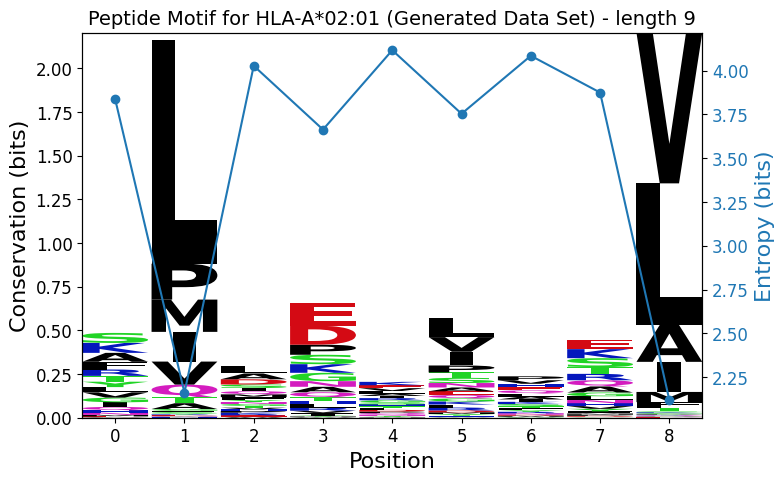

In [9]:
fig, avg_entropy = allele_logo(gen_df, allele, length, generated=True)
print("Average entropy:", avg_entropy, "Max entropy (uniform):", np.log(20)*length)
plt.show()

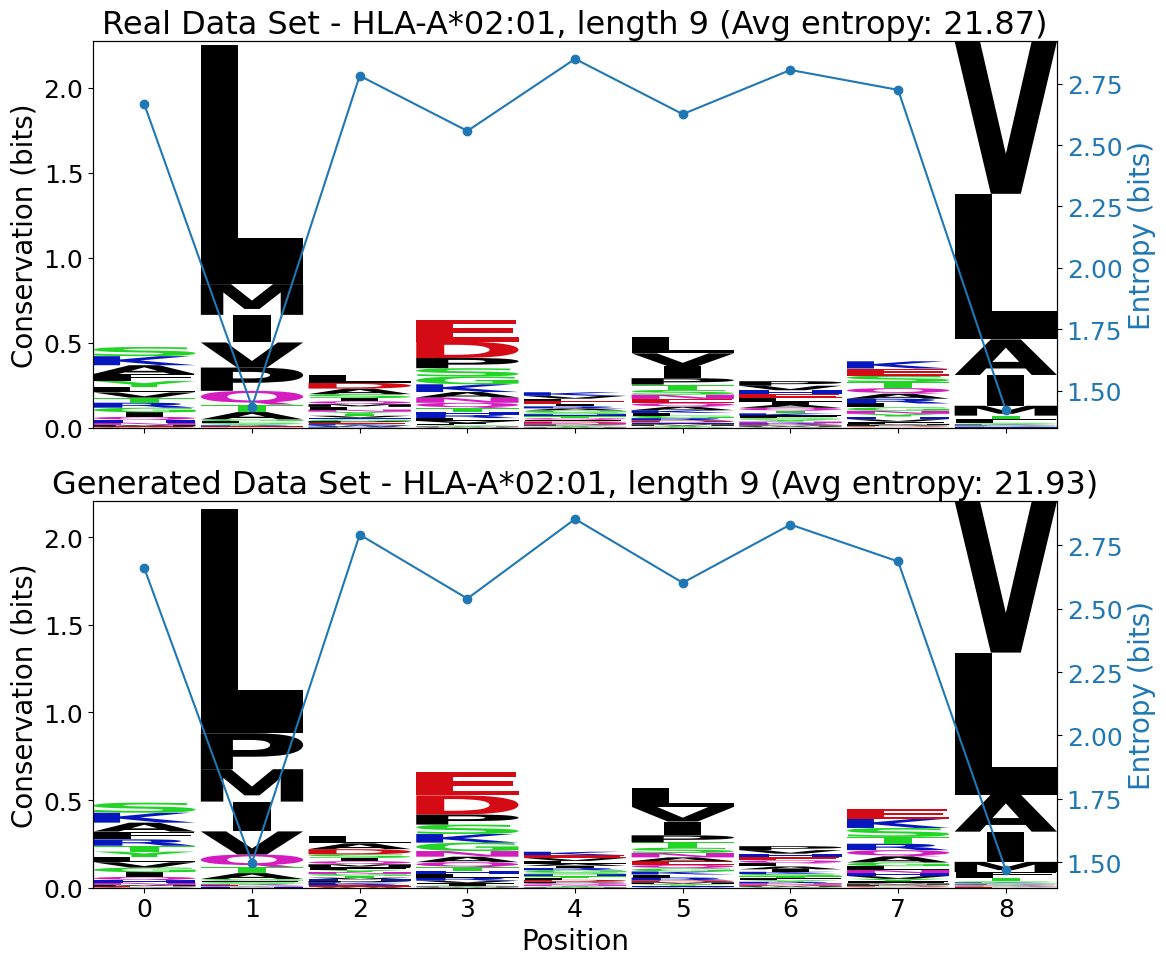

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logomaker

def allele_logo_subplot(df, allele, length, cond_mon=True, cond_anti=True, generated=False):
    aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
          'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
    aadict = {aa[i]: i for i in range(len(aa))}

    if 'Evidence' in df.columns:
        if cond_mon and cond_anti:
            df = df[(df['Evidence'] == 'Single allele present') | (df['Evidence'].str.contains('antibody'))]
        elif cond_mon:
            df = df[df['Evidence'] == 'Single allele present']
        elif cond_anti:
            df = df[df['Evidence'].str.contains('antibody')]

    if 'MHC allele' in df.columns:
        df = df[df['MHC allele'] == allele]
    if 'length' in df.columns:
        df = df[df['length'] == length]
    elif 'Length' in df.columns:
        df = df[df['Length'] == length]

    M = np.zeros((20, length))
    for pos in range(length):
        col_name = 'Peptide' if 'Peptide' in df.columns else 'peptide'
        letters = df[col_name].astype(str).str[pos]
        counts = letters.value_counts()
        for aa_letter in aa[:-1]:
            if aa_letter in counts:
                M[aadict[aa_letter], pos] = counts[aa_letter]

    if len(df) > 0:
        M /= len(df)

    H = -np.sum(M * np.log(M + 1e-16), axis=0)
    avg_entropy = np.sum(H)
    max_info = np.log2(20)
    info_content = max_info - H / np.log(2)
    M_info_scaled = M * info_content[np.newaxis, :]
    df_logo = pd.DataFrame(M_info_scaled.T, columns=aa[:-1])

    return df_logo, H, avg_entropy

def plot_combined_allele_logo(real_df, gen_df, allele, length):
    # Font sizes
    SMALL_SIZE = 18
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 23
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=BIGGER_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('xtick', labelsize=SMALL_SIZE)
    plt.rc('ytick', labelsize=SMALL_SIZE)
    plt.rc('legend', fontsize=MEDIUM_SIZE)
    plt.rc('figure', titlesize=BIGGER_SIZE)
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    for i, (df, title, generated) in enumerate([
        (real_df, "Real Data Set", False),
        (gen_df, "Generated Data Set", True)
    ]):
        df_logo, H, avg_entropy = allele_logo_subplot(df, allele, length, generated=generated)
        ax = axes[i]
        logomaker.Logo(df_logo, ax=ax)
        ax.set_ylabel("Conservation (bits)", fontsize=MEDIUM_SIZE)
        ax.set_title(f"{title} - {allele}, length {length} (Avg entropy: {avg_entropy:.2f})", fontsize=BIGGER_SIZE)

        ax2 = ax.twinx()
        ax2.plot(np.arange(length), H, color='tab:blue', marker='o')
        ax2.set_ylabel("Entropy (bits)", color='tab:blue', fontsize=MEDIUM_SIZE)
        ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=SMALL_SIZE)

    axes[-1].set_xlabel("Position", fontsize=MEDIUM_SIZE)
    plt.tight_layout()
    plt.show()


plot_combined_allele_logo(real_df, gen_df, allele="HLA-A*02:01", length=9)

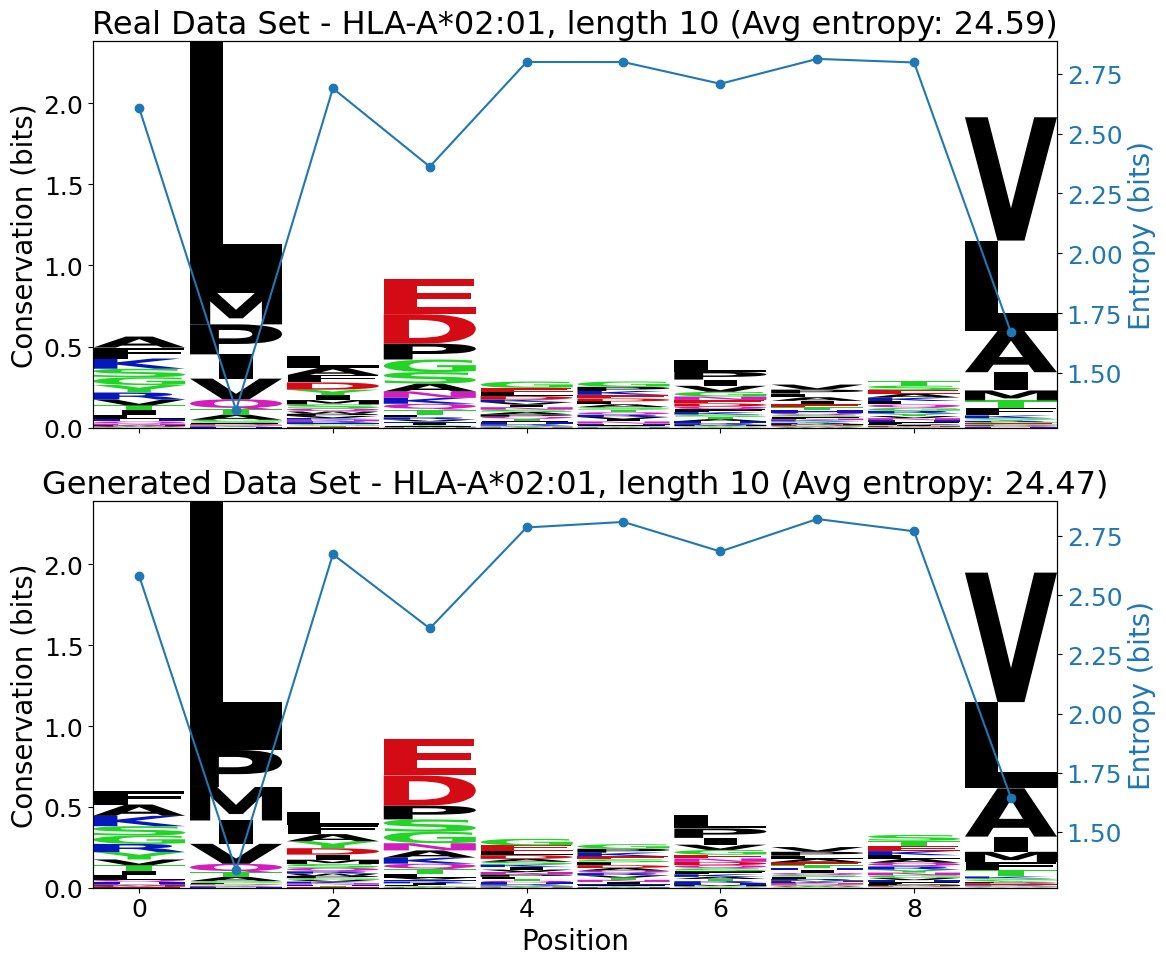

In [11]:
plot_combined_allele_logo(real_df, gen_df, allele="HLA-A*02:01", length=10)

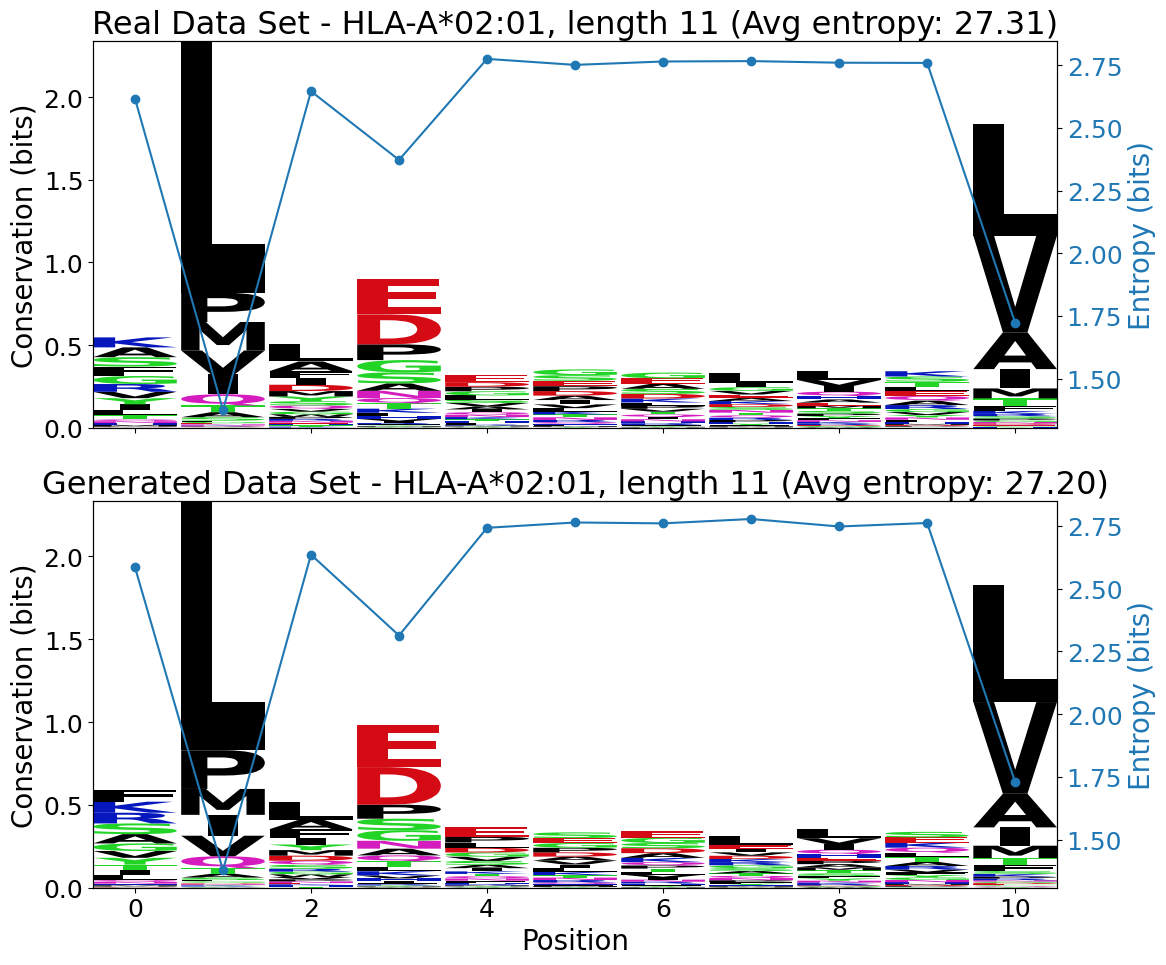

In [12]:
plot_combined_allele_logo(real_df, gen_df, allele="HLA-A*02:01", length=11)

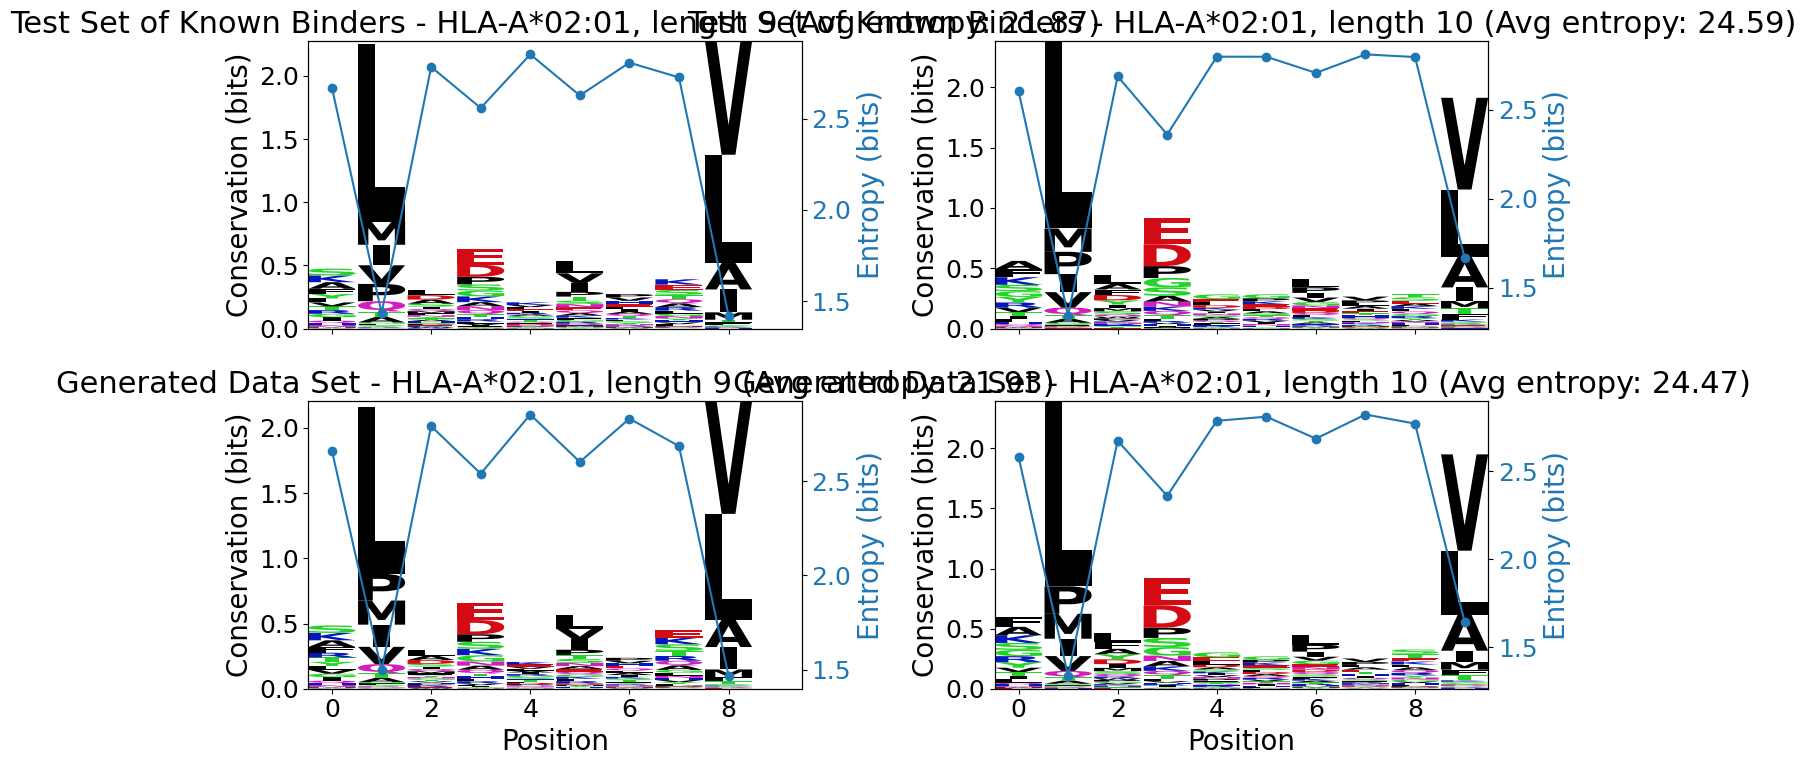

In [13]:

def plot_2x2_logo(real_df, gen_df, allele, length):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

    # Left-hand side: specified length
    for i, (df, title, generated) in enumerate([
        (real_df, "Test Set of Known Binders", False),
        (gen_df, "Generated Data Set", True)
    ]):
        df_logo, H, avg_entropy = allele_logo_subplot(df, allele, length, generated=generated)
        ax = axes[i, 0]
        logomaker.Logo(df_logo, ax=ax)
        ax.set_ylabel("Conservation (bits)")
        ax.set_title(f"{title} - {allele}, length {length} (Avg entropy: {avg_entropy:.2f})",
                     fontsize=22)

        ax2 = ax.twinx()
        ax2.plot(np.arange(length), H, color='tab:blue', marker='o')
        ax2.set_ylabel("Entropy (bits)", color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

    # Right-hand side: fixed length 10
    for i, (df, title, generated) in enumerate([
        (real_df, "Test Set of Known Binders", False),
        (gen_df, "Generated Data Set", True)
    ]):
        df_logo, H, avg_entropy = allele_logo_subplot(df, allele, 10, generated=generated)
        ax = axes[i, 1]
        logomaker.Logo(df_logo, ax=ax)
        ax.set_ylabel("Conservation (bits)")
        ax.set_title(f"{title} - {allele}, length 10 (Avg entropy: {avg_entropy:.2f})",
                     fontsize=22)

        ax2 = ax.twinx()
        ax2.plot(np.arange(10), H, color='tab:blue', marker='o')
        ax2.set_ylabel("Entropy (bits)", color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

    axes[1, 0].set_xlabel("Position")
    axes[1, 1].set_xlabel("Position")

    plt.tight_layout()
    plt.show()

# Example usage
plot_2x2_logo(real_df, gen_df, allele="HLA-A*02:01", length=9)


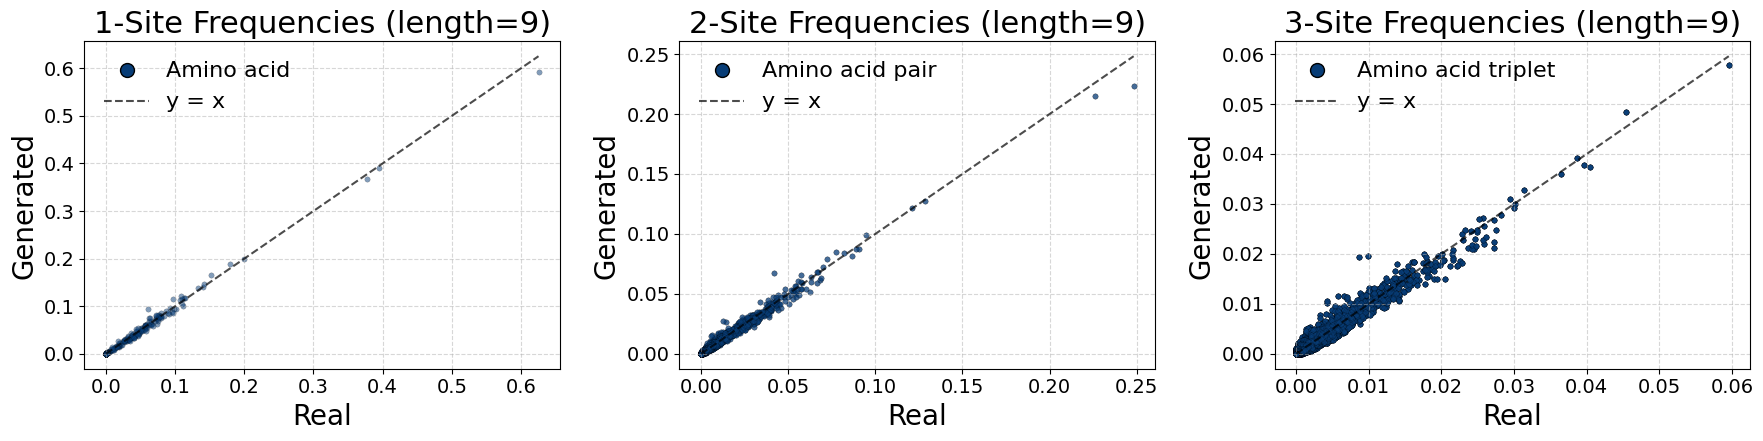

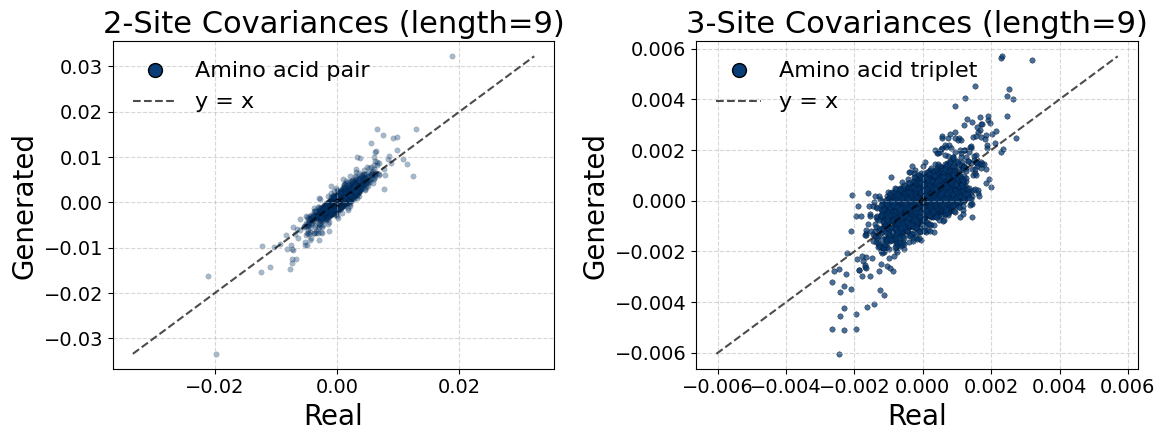

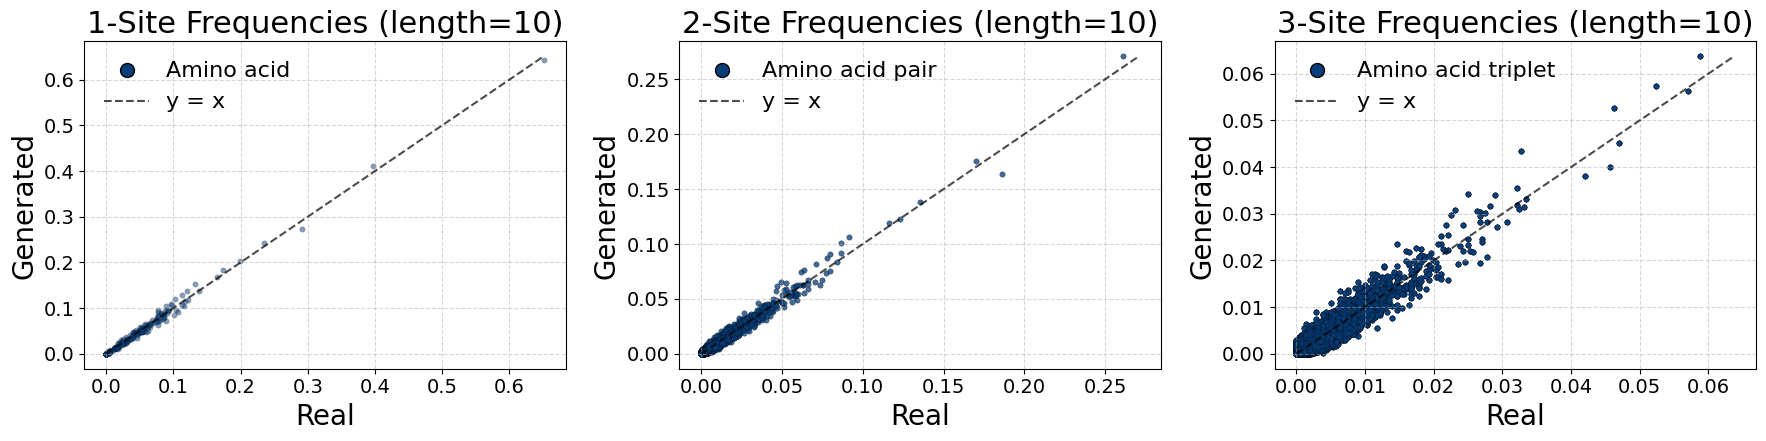

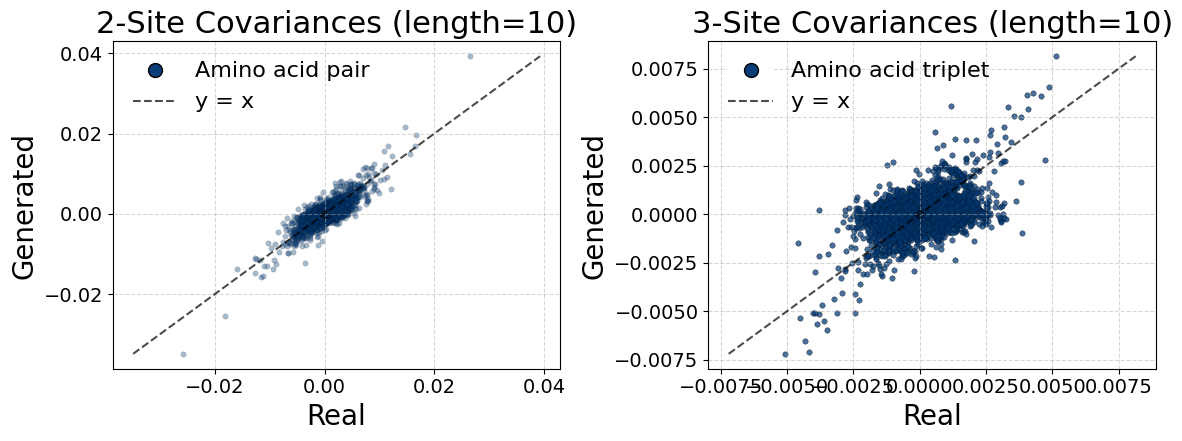

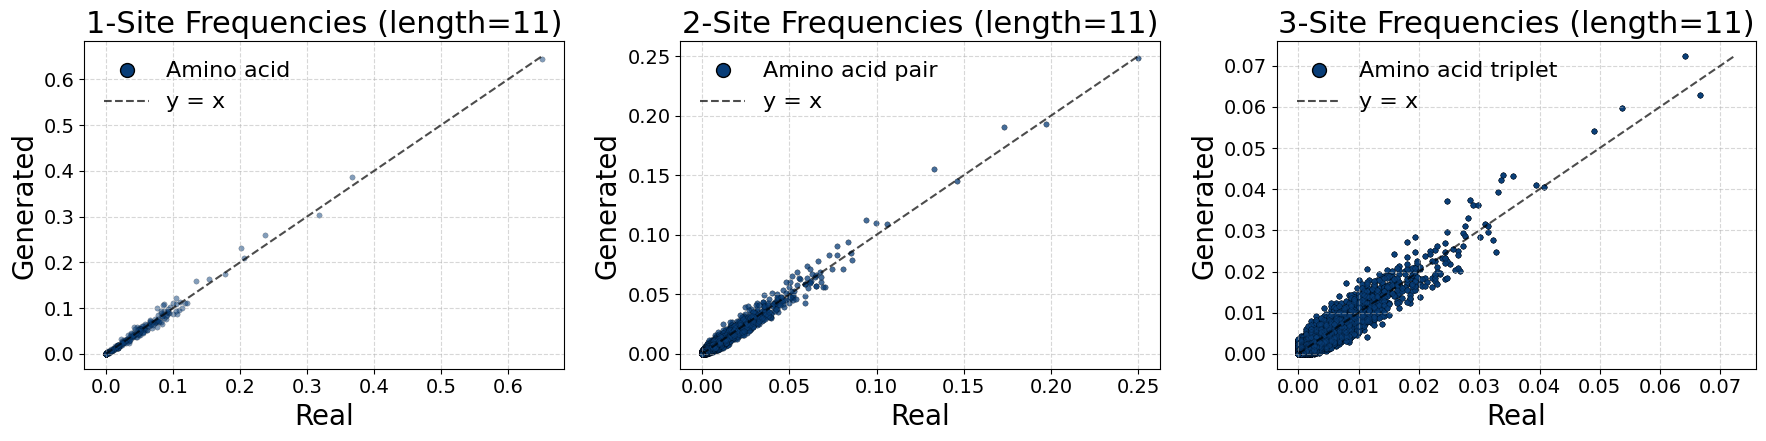

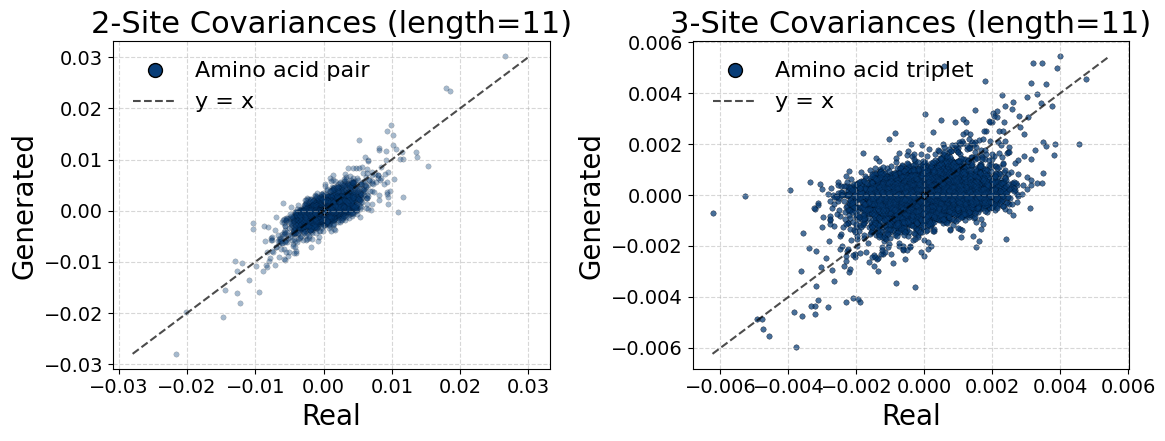

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Helper to flatten arrays
def get_unique_pairs(matrix):
    matrix = np.array(matrix)
    if matrix.size == 0:
        return np.array([])
    return matrix.flatten()

# Scatter plotting for one subplot
def scatter_ax(ax, real_data, gen_data, title, x_label, y_label, label, color, alpha=0.5, s=15):
    # Plot scatter points with desired alpha
    ax.scatter(real_data, gen_data, s=s, alpha=alpha, edgecolor='k',
               linewidth=0.2, c=color)

    # Plot reference line
    lims = [min(np.min(real_data), np.min(gen_data)),
            max(np.max(real_data), np.max(gen_data))]
    ax.plot(lims, lims, 'k--', alpha=0.7)

    # Styling (same for both frequencies and covariances)
    ax.set_title(title, fontsize=22)  
    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label, fontsize=20)
    ax.tick_params(axis='both', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    # Custom legend handles (solid dot and line with labels)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=color, markeredgecolor='k', markersize=10, alpha=1),
        Line2D([0], [0], color='k', linestyle='--', label="y = x", alpha=0.7)
    ]
    ax.legend(handles=legend_elements, loc="upper left", fontsize=16, frameon=False)


# Use your original single color
plot_color = colors[1]

# Loop over lengths
lengths = [9, 10, 11]

for length in lengths:
    # ---------------- Frequencies ----------------
    fig_freq, axes_freq = plt.subplots(1, 3, figsize=(18, 5))

    scatter_ax(axes_freq[0], mudata_by_length[length].flatten(), mugen_by_length[length].flatten(),
               f"1-Site Frequencies (length={length})", "Real", "Generated",
               label="Amino acid", color=plot_color)
    
    scatter_ax(axes_freq[1], get_unique_pairs(fdata_by_length[length]), get_unique_pairs(fgen_by_length[length]),
               f"2-Site Frequencies (length={length})", "Real", "Generated",
               label="Amino acid pair", color=plot_color)
    
    scatter_ax(axes_freq[2], get_unique_pairs(f3data_by_length[length]), get_unique_pairs(f3gen_by_length[length]),
               f"3-Site Frequencies (length={length})", "Real", "Generated",
               label="Amino acid triplet", color=plot_color)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # ---------------- Covariances ----------------
    fig_cov, axes_cov = plt.subplots(1, 2, figsize=(12, 5))

    scatter_ax(axes_cov[0], get_unique_pairs(cov_data_by_length[length]), get_unique_pairs(cov_gen_by_length[length]),
               f"2-Site Covariances (length={length})", "Real", "Generated",
               label="Amino acid pair", color=plot_color, alpha=0.2)
    
    scatter_ax(axes_cov[1], get_unique_pairs(cov3_data_by_length[length]), get_unique_pairs(cov3_gen_by_length[length]),
               f"3-Site Covariances (length={length})", "Real", "Generated",
               label="Amino acid triplet", color=plot_color, alpha=0.2)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [15]:
# Function to compute Pearson correlation coefficient
def pearson_corr(x, y):
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    if x.size == 0 or y.size == 0:
        return np.nan
    # Subtract means
    x_centered = x - np.mean(x)
    y_centered = y - np.mean(y)
    # Compute correlation
    return np.sum(x_centered * y_centered) / (np.sqrt(np.sum(x_centered**2)) * np.sqrt(np.sum(y_centered**2)))

# Loop over lengths
lengths = [9, 10, 11]

for length in lengths:
    print(f"Length {length}:")
    
    # 1-site frequencies
    r1 = pearson_corr(mudata_by_length[length], mugen_by_length[length])
    print(f"  1-site frequency correlation: {r1:.4f}")
    
    # 2-site frequencies
    r2 = pearson_corr(get_unique_pairs(fdata_by_length[length]), get_unique_pairs(fgen_by_length[length]))
    print(f"  2-site frequency correlation: {r2:.4f}")
    
    # 3-site frequencies
    r3 = pearson_corr(get_unique_pairs(f3data_by_length[length]), get_unique_pairs(f3gen_by_length[length]))
    print(f"  3-site frequency correlation: {r3:.4f}")
    
    # 2-site covariances
    r2cov = pearson_corr(get_unique_pairs(cov_data_by_length[length]), get_unique_pairs(cov_gen_by_length[length]))
    print(f"  2-site covariance correlation: {r2cov:.4f}")
    
    # 3-site covariances
    r3cov = pearson_corr(get_unique_pairs(cov3_data_by_length[length]), get_unique_pairs(cov3_gen_by_length[length]))
    print(f"  3-site covariance correlation: {r3cov:.4f}")
    
    print("-" * 50)


Length 9:
  1-site frequency correlation: 0.9968
  2-site frequency correlation: 0.9923
  3-site frequency correlation: 0.9686
  2-site covariance correlation: 0.8806
  3-site covariance correlation: 0.3486
--------------------------------------------------
Length 10:
  1-site frequency correlation: 0.9965
  2-site frequency correlation: 0.9852
  3-site frequency correlation: 0.9081
  2-site covariance correlation: 0.7563
  3-site covariance correlation: 0.1728
--------------------------------------------------
Length 11:
  1-site frequency correlation: 0.9947
  2-site frequency correlation: 0.9802
  3-site frequency correlation: 0.8837
  2-site covariance correlation: 0.6855
  3-site covariance correlation: 0.1084
--------------------------------------------------
